# Segmentation of Trajectory

#### Trajectory segmentation is the process of partitioning a given trajectory into a small number of homogeneous segments w.r.t. some criteria.

#### A trajectory of a moving object is a series of locations sampled at discrete instances of time and defined as a sequence of pairs, (p 1 , t 1 ), (p 2 , t 2 ),. . .,(p n , t n ), where p i is a two- or three-dimensional vector representing the geospatial position observed at a timestamp t i (i = 1, . . . , n).

#### Trajectory segmentation is an attempt to partition a given trajectory into a small number of homogeneous segments, such that the data within each segment are similar w.r.t. some criteria and thus can be effectively described by a simple model.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Imported PANDAS, NUMPY, MATPLOTLIB python library needed for implementing the project. 

In [162]:
file = 'gps.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
df1 = xl.parse('20171013-085046')

[u'20171013-085046']


#### An excel file 'gps.xlsx' is read and parsed in dataframe.

In [163]:
df1 = xl.parse('20171013-085046')
print(df1)

      index       date  hours  minutes  sec  longitude   latitude  speed  \
0         0 2017-10-13      3       26   35  30.332569  78.049929   1.45   
1         1 2017-10-13      3       26   36  30.332606  78.049980   2.94   
2         2 2017-10-13      3       26   37  30.332636  78.050016   3.03   
3         3 2017-10-13      3       26   38  30.332670  78.050057   3.19   
4         4 2017-10-13      3       26   39  30.332702  78.050101   3.75   
5         5 2017-10-13      3       26   40  30.332723  78.050134   3.47   
6         6 2017-10-13      3       26   41  30.332748  78.050178   4.95   
7         7 2017-10-13      3       26   42  30.332768  78.050240   5.35   
8         8 2017-10-13      3       26   43  30.332805  78.050277   5.55   
9         9 2017-10-13      3       26   44  30.332824  78.050327   5.62   
10       10 2017-10-13      3       26   45  30.332863  78.050382   5.92   
11       11 2017-10-13      3       26   46  30.332898  78.050483   7.01   
12       12 

#### Above the dataframe loaded with excel data is printed which has various column index, date, time in hours, minutes, second, latitude, longitude, speed of moving object.

In [222]:
datarows = df1.shape[0] #size of dataframe

print "Datarows:",datarows,"\n"

convtimelist = [] #list to store the time converted in seconds

for i in range(0, datarows):
    convtime = df1.hours[i] * 60 * 60 + df1.minutes[i] * 60 + df1.sec[i] #time is getting converted in seconds
    convtimelist.append(convtime) #converted time is appended in list

print convtimelist,"\n" #converted time list is printed
print("length of convtimelist:",len(convtimelist))

Datarows: 1400 

[12395, 12396, 12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12405, 12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414, 12415, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12423, 12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432, 12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441, 12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12459, 12460, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12468, 12469, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12482, 12483, 12484, 12485, 12486, 12487, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12495, 12496, 12497, 12498, 12499, 12500, 12501, 12502, 12503, 12504, 12505, 12506, 12507, 12508, 12509, 12510, 12511, 12512, 12513, 12514, 12515, 12516, 12517, 12518, 12519, 12520, 12521, 12522, 12523, 12524, 12525, 12526, 12527, 12528, 12529, 12530, 12531, 12532, 12533, 12534, 12

#### TIme from dataframe column hours, minutes, second is converted in second and printed above.

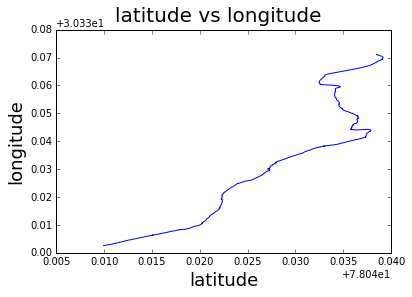

In [223]:
plt.plot(df1.latitude, df1.longitude)
plt.suptitle('latitude vs longitude', fontsize=20)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('longitude', fontsize=18)
plt.show()

#### The path of moving object is plotted above with the help of latitude and longitude position.

In [224]:
threshold = 0.005    #threshold value set for getting breaking point
breakingPointLat = []     #list for storing breaking point latitude
breakingPointLong = []    #list for storing breaking point longitude
def posMaxIndex(df1, lst, start, endss):
    print "Start:  ",start,"\n"
    print "end:    ",endss,"\n"
    
    newLat = range(0, 2000)   #list for storing new latitude position
    newLong = range(0, 2000)  #list for storing new longitude position
    
    #This part of function is for calculating the projected position of original position.
    for i in range(start, endss):
        newPosLat1 = ((lst[i] - lst[start]) / float(lst[endss] - lst[start])) * df1.latitude[endss]
        newPosLat2 = ((lst[endss] - lst[i]) / float(lst[endss] - lst[start])) * df1.latitude[start]
        newPosLat = newPosLat1 + newPosLat2
        newLat[i] = newPosLat
        
        newPosLong1 = ((lst[i] - lst[start]) / float(lst[endss] - lst[start])) * df1.longitude[endss]
        newPosLong2 = ((lst[endss] - lst[i]) / float(lst[endss] - lst[start])) * df1.longitude[start]
        newPosLong = newPosLong1 + newPosLong2
        newLong[i] = newPosLong

    maxs = 0       #maxs variable initialized for max distance
    dist = 0       #dist variable initialized for distance
    
    #This is for calculating distance between original position and projected position
    #and getting maximum distance out of it to decide breaking point.
    for j in range(start, endss):
        dist = ((newLat[j] - df1.latitude[j])**2 + (newLong[j] - df1.longitude[j])**2)**0.5
        print j,"  ",newLat[j],"  ",df1.latitude[j],"  ",newLong[j],"  ",df1.longitude[j],"  ",dist
        if dist > maxs:
            maxs = dist
            index = j
    print "\nMax Distance:  ", maxs,"\n"
    
    print "Index:  ",index,"\n"
    
    #breaking point is appending in list
    breakingPointLat.append(df1.latitude[index]) 
    breakingPointLong.append(df1.longitude[index])
    
    #posMaxIndex is a recursion method. 
    #It is called by checking whether maximum distance is greater than threshold 
    #value or not.
    #Threshold value is less than max distance the method is called else not.
    if threshold < maxs:
        posMaxIndex(df1, convtimelist, start, index)
        posMaxIndex(df1, convtimelist, index, endss)


posMaxIndex(df1, convtimelist, 0, datarows-1) #calling the posMaxIndex method for first time.

Start:   0 

end:     1399 

0    78.04992886    78.04992886    30.33256911    30.33256911    0.0
1    78.0499492648    78.04998046    30.332618113    30.33260557    3.36224130391e-05
2    78.0499696696    78.05001555    30.332667116    30.3326363    5.52687591152e-05
3    78.0499900745    78.05005715    30.332716119    30.33267006    8.13668544662e-05
4    78.0500104793    78.0501009    30.3327651221    30.33270223    0.000110142272487
5    78.0500308841    78.05013409    30.3328141251    30.33272328    0.000137492869281
6    78.0500512889    78.05017791    30.3328631281    30.33274777    0.000171290374164
7    78.0500716937    78.05024028    30.3329121311    30.33276796    0.000221825703768
8    78.0500920985    78.05027688    30.3329611341    30.33280535    0.000241687572962
9    78.0501125034    78.0503274    30.3330101371    30.33282423    0.000284151427499
10    78.0501329082    78.05038163    30.3330591402    30.33286274    0.000316915713842
11    78.050153313    78.0504829    3

159    78.053173226    78.05573623    30.3403605896    30.3367528    0.00442550960995
160    78.0531936308    78.05574059    30.3404095926    30.33675338    0.00445588282842
161    78.0532140357    78.05575135    30.3404585956    30.33675429    0.00448997153842
162    78.0532344405    78.05575912    30.3405075987    30.33675493    0.00452288943233
163    78.0532548453    78.05576744    30.3405566017    30.33675976    0.00455292641282
164    78.0532752501    78.05577262    30.3406056047    30.33676189    0.0045837756323
165    78.0532956549    78.05579502    30.3406546077    30.33677334    0.00461639088854
166    78.0533160597    78.05579888    30.3407036107    30.33677598    0.00464657718911
167    78.0533364646    78.05582135    30.3407526137    30.33678702    0.0046798065561
168    78.0533568694    78.05584687    30.3408016168    30.33680598    0.00470799492678
169    78.0533772742    78.05585014    30.3408506198    30.33680903    0.00473809172793
170    78.053397679    78.05587984  

290    78.0558462571    78.06039225    30.3467799848    30.34108088    0.00729011976781
291    78.055866662    78.06040326    30.3468289878    30.34111627    0.00729492058017
292    78.0558870668    78.06041015    30.3468779908    30.34114675    0.00730105492124
293    78.0559074716    78.06042052    30.3469269938    30.34119381    0.00729636913776
294    78.0559278764    78.06049777    30.3469759968    30.3412956    0.00729046196024
295    78.0559482812    78.06054692    30.3470249998    30.34142679    0.00724482105131
296    78.055968686    78.06057983    30.3470740029    30.34151879    0.00721962869848
297    78.0559890909    78.06062058    30.3471230059    30.34160569    0.00720357315219
298    78.0560094957    78.0606424    30.3471720089    30.34171019    0.00716207149517
299    78.0560299005    78.06066875    30.3472210119    30.3418055    0.00713068678243
300    78.0560503053    78.06067995    30.3472700149    30.34188376    0.00710248914637
301    78.0560707101    78.06067914  

421    78.0585192883    78.06232138    30.3531993799    30.34985715    0.00506225270246
422    78.0585396931    78.06232193    30.3532483829    30.34996293    0.00500994182799
423    78.0585600979    78.06235178    30.353297386    30.35006234    0.00498421262438
424    78.0585805027    78.06235775    30.353346389    30.35017516    0.00493196616243
425    78.0586009075    78.06232673    30.353395392    30.35027278    0.00486132272851
426    78.0586213124    78.06230931    30.353444395    30.35038765    0.00479009568495
427    78.0586417172    78.06232897    30.353493398    30.35050574    0.00474572796116
428    78.058662122    78.06230616    30.353542401    30.35060123    0.00468289441532
429    78.0586825268    78.06233188    30.3535914041    30.35070286    0.00465418795156
430    78.0587029316    78.06233565    30.3536404071    30.35079511    0.00461436433568
431    78.0587233364    78.06237844    30.3536894101    30.35089019    0.00460384786028
432    78.0587437413    78.06238834    

560    78.0613555579    78.06729343    30.3600107992    30.3604661    0.00595530213901
561    78.0613759627    78.06730465    30.3600598022    30.36050697    0.00594552702378
562    78.0613963676    78.06729874    30.3601088052    30.36055873    0.00591949598198
563    78.0614167724    78.06730599    30.3601578083    30.36061831    0.00590719442957
564    78.0614371772    78.06732156    30.3602068113    30.36068814    0.00590403576417
565    78.061457582    78.06732082    30.3602558143    30.36075078    0.00588409302405
566    78.0614779868    78.06733547    30.3603048173    30.36081124    0.00587933440044
567    78.0614983917    78.06734584    30.3603538203    30.36088271    0.00587131812152
568    78.0615187965    78.06736875    30.3604028233    30.36095948    0.00587637838768
569    78.0615392013    78.06738322    30.3604518264    30.36102628    0.00587218457757
570    78.0615596061    78.06740891    30.3605008294    30.36111478    0.0058814361714
571    78.0615800109    78.06746238

704    78.0642938517    78.07104441    30.3670672336    30.36628411    0.00679583108729
705    78.0643142565    78.07111686    30.3671162366    30.36634586    0.00684608607188
706    78.0643346613    78.07116688    30.3671652396    30.3664264    0.00687205181305
707    78.0643550661    78.07123151    30.3672142426    30.36651291    0.0069121160078
708    78.064375471    78.07126398    30.3672632456    30.3665793    0.00692237954468
709    78.0643958758    78.07135527    30.3673122487    30.36662181    0.0069935594377
710    78.0644162806    78.07141271    30.3673612517    30.36668836    0.00702871309319
711    78.0644366854    78.07146658    30.3674102547    30.36675457    0.00706040653535
712    78.0644570902    78.071531    30.3674592577    30.36683138    0.00710172021177
713    78.064477495    78.07160788    30.3675082607    30.36695058    0.00715216033624
714    78.0644978999    78.07166457    30.3675572637    30.36702922    0.00718609707197
715    78.0645183047    78.07172035    3

841    78.0670893117    78.07740195    30.3737806468    30.37246834    0.0103958000048
842    78.0671097165    78.07740128    30.3738296498    30.37256666    0.0103687714837
843    78.0671301213    78.07740613    30.3738786529    30.37259028    0.0103564597487
844    78.0671505262    78.07741713    30.3739276559    30.37269834    0.0103399406138
845    78.067170931    78.07745167    30.3739766589    30.37277669    0.0103505323609
846    78.0671913358    78.07749234    30.3740256619    30.37284497    0.0103684483397
847    78.0672117406    78.07752599    30.3740746649    30.37292657    0.0103779507774
848    78.0672321454    78.07755944    30.3741236679    30.37300685    0.0103875066979
849    78.0672525503    78.07758505    30.374172671    30.37309556    0.0103884897408
850    78.0672729551    78.07760533    30.374221674    30.37317354    0.0103854011269
851    78.0672933599    78.07768326    30.374270677    30.37330487    0.0104346924981
852    78.0673137647    78.07770434    30.37431

1016    78.0706601548    78.07480673    30.3823561747    30.38185924    0.00417624591002
1017    78.0706805596    78.07478108    30.3824051777    30.38189768    0.00413180605236
1018    78.0707009644    78.07475549    30.3824541807    30.38194317    0.00408660120887
1019    78.0707213693    78.07473556    30.3825031838    30.38198078    0.00404804063068
1020    78.0707417741    78.0747187    30.3825521868    30.38200467    0.00401443823889
1021    78.0707621789    78.07471278    30.3826011898    30.38200682    0.00399506251509
1022    78.0707825837    78.07470611    30.3826501928    30.38200708    0.00397588387278
1023    78.0708029885    78.07470456    30.3826991958    30.38201391    0.00396129733194
1024    78.0708233934    78.07470216    30.3827481988    30.38203037    0.00394463039368
1025    78.0708437982    78.07470309    30.3827972019    30.38205087    0.00393079440578
1026    78.070864203    78.07469966    30.3828462049    30.38208399    0.00391046058625
1027    78.0708846078  

1173    78.0738637112    78.07397286    30.3900496483    30.39006197    0.000109842098429
1174    78.073884116    78.07384228    30.3900986513    30.39009313    4.21987750743e-05
1175    78.0739045208    78.07371516    30.3901476543    30.39010677    0.000193724162211
1176    78.0739249256    78.07361283    30.3901966573    30.39011975    0.000321431844723
1177    78.0739453305    78.07350156    30.3902456604    30.39013183    0.000458137068901
1178    78.0739657353    78.07340412    30.3902946634    30.39014404    0.000581462917086
1179    78.0739861401    78.07331972    30.3903436664    30.39013964    0.000696952304535
1180    78.0740065449    78.0732514    30.3903926694    30.39014655    0.000794240899039
1181    78.0740269497    78.07315752    30.3904416724    30.39014724    0.00091793164921
1182    78.0740473546    78.07308074    30.3904906754    30.39015642    0.00102277582523
1183    78.0740677594    78.07299589    30.3905396784    30.39017657    0.00113170300613
1184    78.0740

1326    78.0769856483    78.07827575    30.3975471098    30.39796912    0.00135737061632
1327    78.0770060531    78.07833398    30.3975961128    30.39809456    0.00141839324019
1328    78.0770264579    78.07840249    30.3976451158    30.39819774    0.00148285457702
1329    78.0770468628    78.07847482    30.3976941188    30.39831958    0.00155893025276
1330    78.0770672676    78.07850506    30.3977431219    30.39841342    0.00158636270791
1331    78.0770876724    78.07854347    30.3977921249    30.39853022    0.0016322166128
1332    78.0771080772    78.07858078    30.3978411279    30.39860916    0.00166094154317
1333    78.077128482    78.07862978    30.3978901309    30.39868711    0.00169972681826
1334    78.0771488868    78.07866095    30.3979391339    30.39874192    0.00171195807436
1335    78.0771692917    78.07869755    30.3979881369    30.39880901    0.00173476399111
1336    78.0771896965    78.07874318    30.39803714    30.39887268    0.00176392692261
1337    78.0772101013    

70    78.0523136256    78.05342028    30.3359568473    30.33517741    0.00135359021428
71    78.0523476937    78.05343058    30.3360052435    30.33517631    0.00136373516773
72    78.0523817617    78.05344926    30.3360536398    30.33518645    0.00137534382243
73    78.0524158298    78.05347464    30.336102036    30.33520131    0.00139010300097
74    78.0524498979    78.05350271    30.3361504323    30.33521916    0.00140558932356
75    78.052483966    78.05354881    30.3361988285    30.33524636    0.0014286668788
76    78.0525180341    78.05363986    30.3362472248    30.33528477    0.0014781111595
77    78.0525521021    78.05369514    30.336295621    30.33532442    0.00149992231152
78    78.0525861702    78.05374364    30.3363440173    30.33537038    0.00151251637654
79    78.0526202383    78.05380058    30.3363924135    30.33539422    0.00154583207034
80    78.0526543064    78.0538373    30.3364408098    30.33544475    0.00154648275846
81    78.0526883745    78.05387663    30.33648920

209    78.0570490887    78.05792058    30.3426839256    30.33831988    0.00445021247915
210    78.0570831568    78.05792296    30.3427323218    30.33831973    0.00449179655362
211    78.0571172248    78.05792684    30.3427807181    30.33832108    0.00453253225303
212    78.0571512929    78.05792646    30.3428291143    30.33831972    0.00457553508471
213    78.057185361    78.05799188    30.3428775106    30.3383446    0.00460410157168
214    78.0572194291    78.05803965    30.3429259068    30.33832283    0.00467558324616
215    78.0572534972    78.05809408    30.3429743031    30.33832981    0.00471994655522
216    78.0572875652    78.05813239    30.3430226993    30.33832053    0.00477746012617
217    78.0573216333    78.05818045    30.3430710956    30.33833374    0.00481457203975
218    78.0573557014    78.05822985    30.3431194918    30.33834982    0.00484911384232
219    78.0573897695    78.05829297    30.3431678881    30.33837318    0.00487903644554
220    78.0574238376    78.0583444

358    78.0621252326    78.06207555    30.3498949664    30.3458339    0.00406137027778
359    78.0621593006    78.06208418    30.3499433626    30.34590515    0.00403891128454
360    78.0621933687    78.06210528    30.3499917589    30.34595345    0.00403926951522
361    78.0622274368    78.06210708    30.3500401551    30.34598767    0.00405427199964
362    78.0622615049    78.06209585    30.3500885514    30.34599598    0.00409592260342
363    78.062295573    78.06206283    30.3501369476    30.34601852    0.00412499882877
364    78.062329641    78.06208286    30.3501853439    30.34605101    0.00414169257616
365    78.0623637091    78.0620876    30.3502337401    30.34610027    0.00414268166997
366    78.0623977772    78.06208633    30.3502821364    30.34611058    0.00418316648245
367    78.0624318453    78.06206662    30.3503305326    30.34610839    0.00423790959028
368    78.0624659134    78.06206496    30.3503789289    30.34612827    0.00426952740776
369    78.0624999814    78.06208074 

517    78.0675420573    78.06651559    30.3575899696    30.35792269    0.00107904488713
518    78.0675761253    78.06650949    30.3576383659    30.35799408    0.00112438582025
519    78.0676101934    78.06658714    30.3576867621    30.35812962    0.00111479208109
520    78.0676442615    78.06667985    30.3577351584    30.35833253    0.00113443483182
521    78.0676783296    78.06668011    30.3577835546    30.35839439    0.00117028294709
522    78.0677123977    78.06666274    30.3578319509    30.35838422    0.00118607857386
523    78.0677464657    78.06673367    30.3578803471    30.3584839    0.00117899587847
524    78.0677805338    78.06677782    30.3579287434    30.35861329    0.00121410011492
525    78.0678146019    78.06681226    30.3579771396    30.35871644    0.00124549361159
526    78.06784867    78.06686308    30.3580255359    30.35881732    0.00126424274676
527    78.0678827381    78.06688221    30.3580739321    30.35891003    0.00130388499296
528    78.0679168061    78.06694694

656    78.0722775203    78.06942031    30.364317048    30.3642874    0.00285736416658
657    78.0723115884    78.0694134    30.3643654442    30.36427797    0.00289950821789
658    78.0723456565    78.06942343    30.3644138404    30.36428903    0.00292489066742
659    78.0723797246    78.06943442    30.3644622367    30.36430673    0.0029494069661
660    78.0724137927    78.06945115    30.3645106329    30.36432811    0.00296825979401
661    78.0724478607    78.06946728    30.3645590292    30.36434557    0.00298821458763
662    78.0724819288    78.06948885    30.3646074254    30.36437527    0.00300206878949
663    78.0725159969    78.06950488    30.3646558217    30.36439989    0.00302197386794
664    78.072550065    78.06952549    30.3647042179    30.36442695    0.00303725721009
665    78.0725841331    78.06954824    30.3647526142    30.36446108    0.00304985883158
666    78.0726182011    78.06957339    30.3648010104    30.36450365    0.00305929700151
667    78.0726522692    78.0695974   

759    78.0757865326    78.07413465    30.3693018614    30.3687738    0.00173423321547
760    78.0758206006    78.07420204    30.3693502576    30.36879728    0.00171041598238
761    78.0758546687    78.07426746    30.3693986539    30.36885664    0.00167720320491
762    78.0758887368    78.07431108    30.3694470501    30.36882711    0.00169508901299
763    78.0759228049    78.07433811    30.3694954464    30.36885751    0.00170828004188
764    78.075956873    78.07442105    30.3695438426    30.36893425    0.00165237869395
765    78.075990941    78.07458378    30.3695922389    30.36908368    0.00149624006522
766    78.0760250091    78.07468309    30.3696406351    30.36918991    0.00141559177403
767    78.0760590772    78.07477101    30.3696890314    30.36927425    0.00135320386697
768    78.0760931453    78.07485596    30.3697374276    30.36932592    0.00130382742095
769    78.0761272134    78.07492904    30.3697858239    30.36939655    0.00125982282441
770    78.0761612814    78.07500112

102    78.0533850133    78.05507294    30.3356453309    30.33632866    0.00182099842461
103    78.0534188971    78.05507462    30.3356754899    30.3363295    0.00178020992244
104    78.053452781    78.05507849    30.3357056489    30.33633504    0.0017432908123
105    78.0534866649    78.05507492    30.335735808    30.33634132    0.0016997644604
106    78.0535205487    78.05508596    30.335765967    30.33634147    0.00166784777659
107    78.0535544326    78.05508158    30.335796126    30.3363444    0.00162258547688
108    78.0535883164    78.05507656    30.335826285    30.33634335    0.00157550788642
109    78.0536222003    78.0550756    30.3358564441    30.33634316    0.00153273061278
110    78.0536560841    78.0550716    30.3358866031    30.33634345    0.00148741192771
111    78.053689968    78.05506771    30.3359167621    30.33634375    0.00144239095795
112    78.0537238518    78.05506667    30.3359469212    30.33634258    0.00139989517572
113    78.0537577357    78.05506833    30.33

246    78.0582642885    78.05971519    30.3399882309    30.33964693    0.00149050374616
247    78.0582981724    78.0597859    30.34001839    30.33973472    0.00151453032823
248    78.0583320562    78.0598391    30.340048549    30.33980382    0.00152678524416
249    78.0583659401    78.05990533    30.340078708    30.33988873    0.00155106831976
250    78.0583998239    78.0599529    30.3401088671    30.33990974    0.00156578951359
251    78.0584337078    78.06000917    30.3401390261    30.33997035    0.0015844660761
252    78.0584675917    78.06005736    30.3401691851    30.34003384    0.00159551924746
253    78.0585014755    78.06007642    30.3401993441    30.34007041    0.00158021331968
254    78.0585353594    78.06009329    30.3402295032    30.34009967    0.00156333121551
255    78.0585692432    78.06010953    30.3402596622    30.34017298    0.0015427239352
256    78.0586031271    78.06016588    30.3402898212    30.34023457    0.00156372931547
257    78.0586370109    78.06018188    30

380    78.0628233848    78.06216113    30.3458767482    30.34690624    0.00122410573407
381    78.0628575746    78.06218477    30.3459371893    30.34699254    0.00125157144796
382    78.0628917643    78.06221492    30.3459976304    30.34708179    0.00127809241999
383    78.0629259541    78.0622274    30.3460580716    30.34717827    0.00132015998685
384    78.0629601439    78.06224045    30.3461185127    30.3472869    0.00137225660504
385    78.0629943336    78.06226711    30.3461789538    30.34739571    0.00141751537751
386    78.0630285234    78.062263    30.3462393949    30.34749169    0.00146774282691
387    78.0630627131    78.06227765    30.346299836    30.34758374    0.0015049031521
388    78.0630969029    78.06227164    30.3463602771    30.34766424    0.00154317138264
389    78.0631310926    78.06228274    30.3464207183    30.3477724    0.00159585264752
390    78.0631652824    78.06230544    30.3464811594    30.34789054    0.00165096414851
391    78.0631994721    78.0623277    3

527    78.0678492783    78.06688221    30.3547615925    30.35891003    0.00425966600172
528    78.0678834681    78.06694694    30.3548220337    30.35900565    0.00428715878832
529    78.0679176578    78.06695499    30.3548824748    30.35907884    0.00430536994707
530    78.0679518476    78.06702129    30.3549429159    30.35918805    0.00434592923631
531    78.0679860373    78.06708715    30.355003357    30.35929366    0.004383457323
532    78.0680202271    78.06726189    30.3550637981    30.35941541    0.00441719378535
533    78.0680544168    78.0672903    30.3551242393    30.35950564    0.00444753268956
534    78.0680886066    78.06726844    30.3551846804    30.35960136    0.00449218567689
535    78.0681227963    78.06731562    30.3552451215    30.35965084    0.00447905003542
536    78.0681569861    78.0673158    30.3553055626    30.35971004    0.00448408464721
537    78.0681911758    78.06731658    30.3553660037    30.35976776    0.00448780304494
538    78.0682253656    78.06731264  

647    78.0719520485    78.06912606    30.3620145267    30.36388377    0.0033882564158
648    78.0719862383    78.06914835    30.3620749678    30.36397241    0.00341378039489
649    78.072020428    78.06922561    30.3621354089    30.3640918    0.00341152072926
650    78.0720546178    78.06927291    30.3621958501    30.36417948    0.00341653125474
651    78.0720888075    78.06936535    30.3622562912    30.36423708    0.00336760229063
652    78.0721229973    78.06937108    30.3623167323    30.36424653    0.00336112597429
653    78.072157187    78.06938435    30.3623771734    30.36423477    0.00333755752013
654    78.0721913768    78.06939077    30.3624376145    30.36425851    0.00334051771119
655    78.0722255665    78.06941341    30.3624980557    30.36427291    0.00332540708166
656    78.0722597563    78.06942031    30.3625584968    30.3642874    0.00332438889377
657    78.072293946    78.0694134    30.3626189379    30.36427797    0.00332414394231
658    78.0723281358    78.06942343    

757    78.0757129212    78.07400606    30.3686630497    30.36869049    0.0017070817376
758    78.0757471109    78.07406572    30.3687234908    30.36872766    0.00168139610066
759    78.0757813007    78.07413465    30.3687839319    30.3687738    0.00164668185406
760    78.0758154904    78.07420204    30.368844373    30.36879728    0.00161413755926
761    78.0758496802    78.07426746    30.3689048142    30.36885664    0.00158295340041
762    78.0758838699    78.07431108    30.3689652553    30.36882711    0.00157884524479
763    78.0759180597    78.07433811    30.3690256964    30.36885751    0.00158887623353
764    78.0759522494    78.07442105    30.3690861375    30.36893425    0.00153871425076
765    78.0759864392    78.07458378    30.3691465786    30.36908368    0.0014040687478
766    78.0760206289    78.07468309    30.3692070198    30.36918991    0.0013376483733
767    78.0760548187    78.07477101    30.3692674609    30.36927425    0.00128382664691
768    78.0760890084    78.07485596  

875    78.0774010965    78.07647134    30.3750196243    30.37404873    0.00134427784604
876    78.0774031464    78.07641321    30.3750694424    30.37403546    0.00143146555514
877    78.0774051962    78.07633865    30.3751192606    30.3740321    0.00152297039482
878    78.077407246    78.07625116    30.3751690787    30.3740508    0.00160844088108
879    78.0774092958    78.07613477    30.3752188968    30.37411716    0.00168470771894
880    78.0774113456    78.07603118    30.375268715    30.37413844    0.00178392227407
881    78.0774133954    78.07593607    30.3753185331    30.37416033    0.00187721200829
882    78.0774154453    78.07587049    30.3753683513    30.3741803    0.00194893625904
883    78.0774174951    78.07586508    30.3754181694    30.3741892    0.00197998948102
884    78.0774195449    78.07586297    30.3754679875    30.37419543    0.00201055417197
885    78.0774215947    78.0758481    30.3755178057    30.37421617    0.00204209231715
886    78.0774236445    78.07581447    

1032    78.0777229176    78.07461417    30.3828410724    30.38240603    0.00313904024032
1033    78.0777249674    78.07459477    30.3828908905    30.38243478    0.00316325351281
1034    78.0777270173    78.07458784    30.3829407086    30.38249381    0.00317082831805
1035    78.0777290671    78.07456038    30.3829905268    30.38253925    0.00320066063101
1036    78.0777311169    78.074559    30.3830403449    30.3826177    0.00320014909977
1037    78.0777331667    78.07455223    30.3830901631    30.38270495    0.0032041765551
1038    78.0777352165    78.07455713    30.3831399812    30.38278043    0.00319836066953
1039    78.0777372663    78.07454195    30.3831897993    30.3828677    0.0032115096837
1040    78.0777393161    78.07457206    30.3832396175    30.38296823    0.00317886185162
1041    78.077741366    78.07457073    30.3832894356    30.38303927    0.00318048978182
1042    78.0777434158    78.07454146    30.3833392538    30.38310405    0.0032105827544
1043    78.0777454656    78.0

1173    78.0780119416    78.07397286    30.3898654302    30.39006197    0.00404386058113
1174    78.0780139915    78.07384228    30.3899152483    30.39009313    0.00417550216948
1175    78.0780160413    78.07371516    30.3899650665    30.39010677    0.00430321503199
1176    78.0780180911    78.07361283    30.3900148846    30.39011975    0.00440650904998
1177    78.0780201409    78.07350156    30.3900647028    30.39013183    0.00451907949218
1178    78.0780221907    78.07340412    30.3901145209    30.39014404    0.00461816506357
1179    78.0780242405    78.07331972    30.390164339    30.39013964    0.00470458537139
1180    78.0780262904    78.0732514    30.3902141572    30.39014655    0.0047753689494
1181    78.0780283402    78.07315752    30.3902639753    30.39014724    0.0048722188211
1182    78.07803039    78.07308074    30.3903137935    30.39015642    0.0049521511856
1183    78.0780324398    78.07299589    30.3903636116    30.39017657    0.00504002167067
1184    78.0780344896    78.

1309    78.0782907166    78.07713517    30.3966406973    30.39658066    0.00115710517547
1310    78.0782927664    78.07723027    30.3966905155    30.39665515    0.00106308481041
1311    78.0782948162    78.07731052    30.3967403336    30.39671737    0.00098456404843
1312    78.078296866    78.07737917    30.3967901518    30.39678446    0.000917713680777
1313    78.0782989158    78.07744432    30.3968399699    30.39684791    0.000854632731084
1314    78.0783009657    78.07752638    30.396889788    30.39691957    0.000775157991868
1315    78.0783030155    78.07762056    30.3969396062    30.39700712    0.000685786843245
1316    78.0783050653    78.07769379    30.3969894243    30.39707266    0.000616916252144
1317    78.0783071151    78.07776291    30.3970392425    30.39713818    0.000553125516403
1318    78.0783091649    78.07783538    30.3970890606    30.39723536    0.000495858516473
1319    78.0783112147    78.07789889    30.3971388787    30.39731728    0.000449264621088
1320    78.0783

853    78.0766684751    78.07780673    30.3737881051    30.3735097    0.0011718078559
854    78.076657044    78.0778208    30.373835266    30.37358896    0.00118953547352
855    78.0766456129    78.07779231    30.3738824269    30.37364035    0.00117197072222
856    78.0766341819    78.07784797    30.3739295878    30.37374207    0.00122818750975
857    78.0766227508    78.07784731    30.3739767487    30.37385031    0.00123106945414
858    78.0766113197    78.07788924    30.3740239096    30.37394612    0.00128028570141
859    78.0765998886    78.0778565    30.3740710705    30.37403959    0.00125700562378
860    78.0765884576    78.07779528    30.3741182313    30.37410377    0.00120690908212
861    78.0765770265    78.07771942    30.3741653922    30.37415167    0.00114247592822
862    78.0765655954    78.0776661    30.3742125531    30.3742049    0.00110053120354
863    78.0765541643    78.07760574    30.374259714    30.37423564    0.00105185119988
864    78.0765427333    78.07751497    30

989    78.0751138487    78.0752082    30.3802019855    30.38088776    0.000692234641972
990    78.0751024176    78.07514662    30.3802491464    30.38091918    0.000671490030629
991    78.0750909865    78.07511177    30.3802963073    30.38101195    0.000715944433203
992    78.0750795555    78.0750536    30.3803434682    30.38105322    0.000710226252002
993    78.0750681244    78.07503985    30.3803906291    30.38113295    0.000742859211454
994    78.0750566933    78.07501298    30.38043779    30.38120585    0.000769302989609
995    78.0750452622    78.07498267    30.3804849508    30.38128317    0.000800669481299
996    78.0750338311    78.07493205    30.3805321117    30.38136225    0.000836354567119
997    78.0750224001    78.07491103    30.3805792726    30.38143852    0.000866434864337
998    78.075010969    78.07489726    30.3806264335    30.38150525    0.000886142307354
999    78.0749995379    78.07488978    30.3806735944    30.38156787    0.000900985953736
1000    78.0749881068    7

1139    78.0733991872    78.07423892    30.3872761183    30.38899646    0.00191434759999
1140    78.0733877561    78.07429182    30.3873232792    30.38903391    0.00193483572194
1141    78.073376325    78.07435561    30.3873704401    30.38910019    0.00198772076302
1142    78.073364894    78.07441666    30.387417601    30.38915867    0.00203409271958
1143    78.0733534629    78.07448561    30.3874647618    30.38922695    0.00209453196962
1144    78.0733420318    78.07453629    30.3875119227    30.38927106    0.00212622119007
1145    78.0733306007    78.07459862    30.3875590836    30.38932631    0.00217507745713
1146    78.0733191697    78.07459974    30.3876062445    30.3893734    0.00218236086666
1147    78.0733077386    78.07463574    30.3876534054    30.38940095    0.00219488039266
1148    78.0732963075    78.07467825    30.3877005663    30.38945174    0.00223077889539
1149    78.0732848764    78.07469525    30.3877477272    30.38951735    0.00226290048653
1150    78.0732734454    

1292    78.0748874541    78.07569742    30.3951298313    30.39554863    0.000911831684526
1293    78.0749209845    78.07576747    30.3951858547    30.39558417    0.000935517417106
1294    78.0749545148    78.07583994    30.395241878    30.39564258    0.000971874392025
1295    78.0749880451    78.07591375    30.3952979014    30.3956804    0.00100161602923
1296    78.0750215755    78.07599696    30.3953539247    30.39573217    0.0010461569873
1297    78.0750551058    78.07608085    30.3954099481    30.39579047    0.00109405121414
1298    78.0750886361    78.07614244    30.3954659715    30.39582989    0.00111487186415
1299    78.0751221665    78.07621962    30.3955219948    30.39589438    0.00115891111025
1300    78.0751556968    78.07631447    30.3955780182    30.39597165    0.00122380607984
1301    78.0751892272    78.076424    30.3956340415    30.39603155    0.00129718039992
1302    78.0752227575    78.07651096    30.3956900649    30.39610427    0.00135315616788
1303    78.0752562878  

#### Above method "posMaxIndex" is called. This method help calculating projected point and distance between original point and projected point and maximum distance out of all distance to decide the breaking point. This method used "Divide and conquer" approach to recurr iteratively.

In [200]:
print("Breaking Point:\n")
print("Latitude         longitude\n")
for i in range(0,len(breakingPointLat)):
    print breakingPointLat[i],"    ",breakingPointLong[i]

Breaking Point:

Latitude         longitude

78.07725146      30.3713829
78.06073781      30.34218984
78.05494645      30.33624274
78.06721495      30.36002186
78.07247327      30.39109615
78.07459498      30.38972029
78.07906847      30.39929182


#### Breaking point is printed above in the form of latitude and longitude position of moving object.

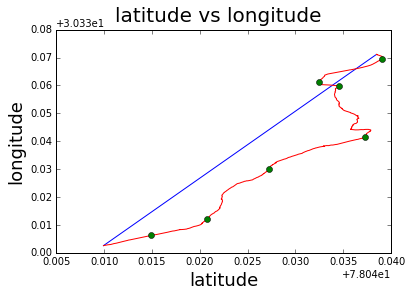

In [202]:
plt.plot(newlat, newlong, 'b')
plt.plot(df1.latitude, df1.longitude, 'r')
plt.plot(breakingPointLat, breakingPointLong, 'go')
plt.suptitle('latitude vs longitude', fontsize=20)
plt.xlabel('latitude', fontsize=18)
plt.ylabel('longitude', fontsize=18)
plt.show()

#### Above graph plot is of breaking point in path of moving object.

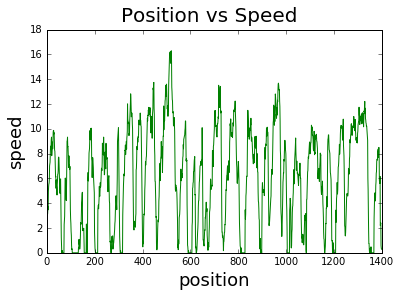

In [208]:
plt.plot(range(0,df1.shape[0]), df1.speed, 'g')
plt.suptitle('Position vs Speed', fontsize=20)
plt.xlabel('position', fontsize=18)
plt.ylabel('speed', fontsize=18)
plt.show()

#### Above plot is speed variation w.r.t. postion of moving object. 